In [1]:
import pandas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as r
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()

def tanh(x):
    return np.tanh(x)

def mse(y_pred, y):
  return np.square(y_pred - y)

def msem(y_pred, y):
  return np.mean(np.square(y_pred - y))

def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def loss_mse(y,y_pred):
    return sum(((y-y_pred)**2))

def loss_rmse(y,y_pred):
    return np.sqrt(sum(((y-y_pred)**2)))

def loss_r2(y,y_pred):
    y_mean = np.mean(y)
    return 1 - sum(((y-y_pred)**2))/(sum((y-y_mean)**2)+0.000000001)

In [3]:
data = pd.read_csv("Steel_industry_data.csv")

In [4]:
data.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
#data['correct_data'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

In [5]:
data.drop(columns=["date"], inplace=True)
#data['day'] = data['correct_data'].dt.day
#data['month'] = data['correct_data'].dt.month
#data['year'] = data['correct_data'].dt.year
#data['hour'] = data['correct_data'].dt.hour
#data['minute'] = data['correct_data'].dt.minute
#data.drop(columns=["correct_data"], inplace=True)

In [6]:
# процент пропусков в данных
for d in data.columns:
    print(d, "--", data[d].isna().sum() / len(data[d]) * 100, "%")

Usage_kWh -- 0.0 %
Lagging_Current_Reactive.Power_kVarh -- 0.0 %
Leading_Current_Reactive_Power_kVarh -- 0.0 %
CO2(tCO2) -- 0.0 %
Lagging_Current_Power_Factor -- 0.0 %
Leading_Current_Power_Factor -- 0.0 %
NSM -- 0.0 %
WeekStatus -- 0.0 %
Day_of_week -- 0.0 %
Load_Type -- 0.0 %


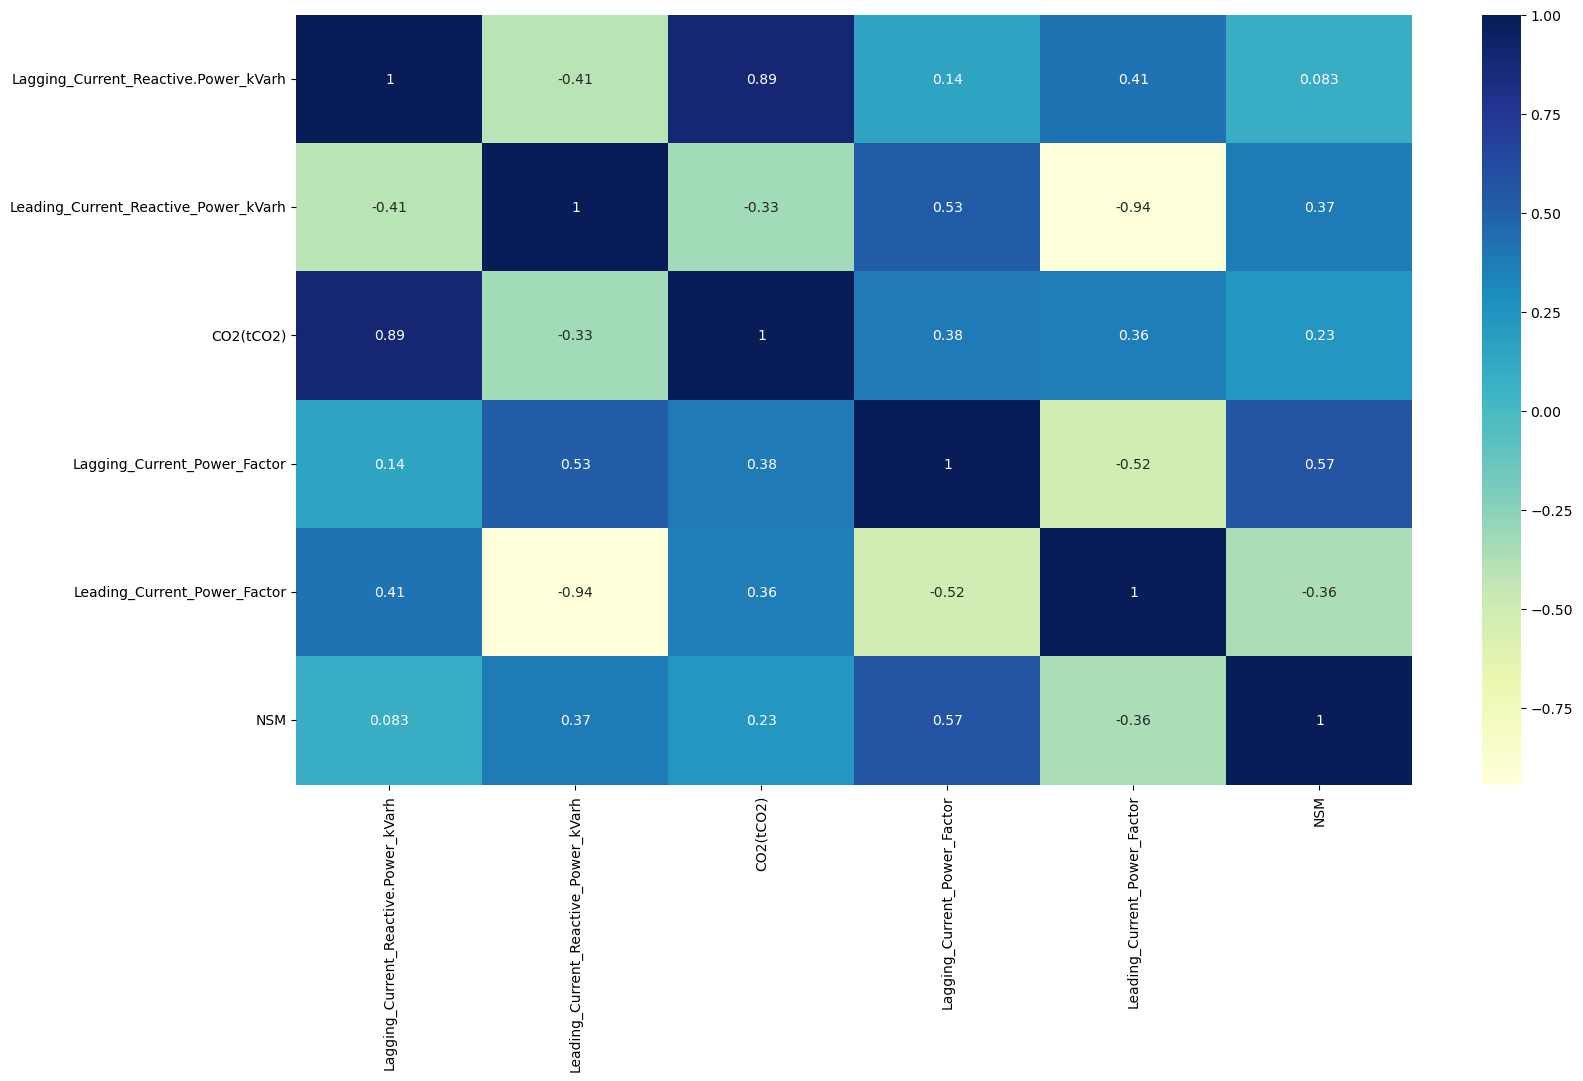

In [7]:
plt.figure(figsize = (18,10))
#sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
sns.heatmap(data.drop(columns=["Usage_kWh"]).corr(), annot = True, cmap = 'YlGnBu')
plt.show()
# Только одна пара проблемных признаков, однако Lagging_current_reactive сильно коррелирует
# с целевым признаком, поэтому лучшим решением будет удалить CO2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [9]:
to_enc = ["WeekStatus", "Day_of_week", "Load_Type"]
le = preprocessing.LabelEncoder()
for column_name in to_enc:
    data[column_name]=le.fit_transform(data[column_name])

In [10]:
data = data.drop(columns=['WeekStatus','Day_of_week'])

In [11]:
data = (data-data.min())/(data.max()-data.min())
Y = np.array(data["Usage_kWh"])
X = np.array(data.drop(columns=["Usage_kWh"]))

In [13]:
X.shape

(35040, 7)

In [14]:
class RNN:
    def __init__(self):
        self.Whh = np.random.rand(50, 50)
        self.Wyh = np.random.rand(50, 1)
        self.Wxh = np.random.rand(7,50)
        x = np.random.randn(1,7,4)
        
    def forward(self, X):
        self.y = np.zeros((len(X)))
        self.Xh0 = self.Wxh.T.dot(X[0])
        self.H0 = tanh(self.Xh0)
        self.y[0] = self.Wyh.T.dot(self.H0)

        self.Xh1 = self.Whh.dot(self.H0) + self.Wxh.T.dot(X[1])
        self.H1 = tanh(self.Xh1)
        self.y[1] = self.Wyh.T.dot(self.H1)

        self.Xh2 = self.Whh.dot(self.H1) + self.Wxh.T.dot(X[2])
        self.H2 = tanh(self.Xh2)
        self.y[2] = self.Wyh.T.dot(self.H2)  
        
        self.Xh3 = self.Whh.dot(self.H2) + self.Wxh.T.dot(X[3])
        self.H3 = tanh(self.Xh3)
        self.y[3] = self.Wyh.T.dot(self.H3)
        return self.y
        
    def backward_prop(self, X, Y):
        m = len(Y)
        dE = ((self.y - Y).T)
        X = X.reshape(4,1,7)
        self.Xh3 = self.Xh3.reshape(50,1)
        self.Xh2 = self.Xh2.reshape(50,1)
        self.Xh1 = self.Xh1.reshape(50,1)
        self.Xh0 = self.Xh0.reshape(50,1)
        self.dWyh = dE[0]*self.H0 + dE[1]*self.H1 + dE[2]*self.H2 + dE[3]*self.H3
        
        self.H0 = tanh(self.Xh0)
        self.H1 = tanh(self.Xh1)
        self.H2 = tanh(self.Xh2)
        self.H3 = tanh(self.Xh3)

        self.dWxh = (dE[2]*self.Wyh.T.dot((1-self.H2**2).dot(X[2]))) + \
                    (dE[2]*self.Wyh.T.dot(1-self.H2**2)[0][0]*(self.Whh).dot(1-self.H0**2).dot(X[1]) + \
                     dE[1]*self.Wyh.T.dot(1-self.H1**2).dot(X[1])) + \
                    (dE[2]*self.Wyh.T.dot(1-self.H2)**2)[0][0]*(self.Whh).dot(1-self.H1**2).T.dot(self.Whh).dot(1-self.H0**2).dot(X[0]) + \
                     dE[1]*self.Wyh.T.dot(1-self.H1**2)[0][0]*(self.Whh).dot(1-self.H0**2).dot(X[0]) + dE[0]*self.Wyh.T.dot(1-self.H0**2).dot(X[0]) + \
                    (dE[3]*self.Wyh.T.dot(1-self.H3**2)[0][0]*(self.Whh).dot(1-self.H2**2).T.dot(self.Whh).dot(1-self.H1**2)*(self.Whh).dot(1-self.H0**2).dot(X[0]) + \
                    dE[3]*self.Wyh.T.dot(1-self.H3**2)[0][0]*(self.Whh).dot(1-self.H2**2)*(self.Whh).dot(1-self.H1**2).dot(X[1]) + \
                    dE[3]*self.Wyh.T.dot(1-self.H3**2)[0][0]*(self.Whh).dot(1-self.H2**2).dot(X[2]) + \
                     dE[3]*self.Wyh.T.dot(1-self.H3**2).dot(X[3]))

        self.dWhh = (dE[2]*self.Wyh*(1-self.H2**2)*self.H1) \
        + (dE[2]*self.Wyh*(1-self.H2**2)*self.Whh*(1-self.H1**2)*self.H0) \
        + (dE[1]*self.Wyh*(1-self.H1**2)*self.H0) \
        + (dE[3]*self.Wyh*(1-self.H3**2)*self.Whh*(1-self.H2**2)*self.Whh*(1-self.H2**2)*self.H0 \
        + dE[3]*self.Wyh*(1-self.H3**2)*self.Whh*(1-self.H1**2)*self.H1 \
        + dE[3]*self.Wyh*(1-self.H3**2)*self.H0)
    
    def update_params(self, alpha=0.01):
        self.dWyh = self.dWyh.reshape((50,1))
        self.Whh = self.Whh - alpha * self.dWhh   
        self.Wyh = self.Wyh - alpha * self.dWyh
        self.Wxh = self.Wxh - alpha * self.dWxh.T 
        #return Whh, Wyh, Wxh
        
    def clip(self, clip_value=1):
        """
        Clips the gradients in order to avoisd the problem of 
        exploding gradient.
        """
        for gradient in [self.dWxh, self.dWhh, self.dWyh]:
            np.clip(gradient, -clip_value, clip_value, out=gradient)
                          
    def train(self, X, Y, epochs):
        mse = []
        rmse = []
        r2 = []
        mse_val = []
        rmse_val = []
        r2_val = []
        n = 10
        for i in range(epochs):
            for k in range(10):
                self.forward(X[k:k+4])
                self.backward_prop(X[k:k+4], Y[k:k+4])
                self.clip()
                self.update_params()
            if i % 1000 == 0:
                loss_mse_sum = 0
                loss_rmse_sum = 0
                loss_r2_sum = 0
                loss_mse_sum_val = 0
                loss_rmse_sum_val = 0
                loss_r2_sum_val = 0
                for j in range(10):
                    y_pred = self.forward(X[j:j+4])
                    loss_mse_sum = loss_mse_sum + loss_mse(Y[j:j+4],y_pred)/4
                    loss_rmse_sum = loss_rmse_sum + loss_rmse(Y[j:j+4],y_pred)/4
                    loss_r2_sum = loss_r2_sum + loss_r2(Y[j:j+4],y_pred)/4
                    mse.append(loss_mse_sum)
                    rmse.append(loss_rmse_sum)
                    r2.append(loss_r2_sum)
                    y_pred = self.forward(X[j+n:j+4+n])
                    loss_mse_sum_val = loss_mse_sum_val + loss_mse(Y[j+n:j+n+4],y_pred)/4
                    loss_rmse_sum_val = loss_rmse_sum_val + loss_rmse(Y[j+n:j+n+4],y_pred)/4
                    loss_r2_sum_val = loss_r2_sum_val + loss_r2(Y[j+n:j+n+4],y_pred)/4
                    mse_val.append(loss_mse_sum_val)
                    rmse_val.append(loss_rmse_sum_val)
                    r2_val.append(loss_r2_sum_val)
                print(f"epoch: [{i}/{epochs}], mse={np.round(loss_mse_sum,5)}, rmse={np.round(loss_rmse_sum,5)}, r2={np.round(loss_r2_sum,3)}\n \
                      mse_val={np.round(loss_mse_sum_val,5)}, rmse_val={np.round(loss_rmse_sum_val,5)}, r2_val={np.round(loss_r2_sum_val,3)}")
        return mse, rmse, r2, mse_val, rmse_val, r2_val

    

In [15]:
rnn = RNN()
mse, rmse, r2, mse_val, rmse_val, r2_val  = rnn.train(X, Y, 200000)

epoch: [0/200000], mse=3496.32013, rmse=93.49222, r2=-470901792.172
                       mse_val=3515.22786, rmse_val=93.74462, r2_val=-556834100.511
epoch: [1000/200000], mse=0.00135, rmse=0.04917, r2=-121.571
                       mse_val=0.00313, rmse_val=0.08132, r2_val=-544.117
epoch: [2000/200000], mse=0.00061, rmse=0.03423, r2=-56.235
                       mse_val=0.00092, rmse_val=0.04166, r2_val=-144.935
epoch: [3000/200000], mse=0.00031, rmse=0.02575, r2=-29.429
                       mse_val=0.00029, rmse_val=0.02238, r2_val=-37.699
epoch: [4000/200000], mse=0.00019, rmse=0.0207, r2=-17.865
                       mse_val=0.00015, rmse_val=0.0179, r2_val=-18.886
epoch: [5000/200000], mse=0.00014, rmse=0.01759, r2=-12.486
                       mse_val=0.00015, rmse_val=0.01799, r2_val=-21.79
epoch: [6000/200000], mse=0.00011, rmse=0.01563, r2=-9.711
                       mse_val=0.00016, rmse_val=0.01892, r2_val=-26.611
epoch: [7000/200000], mse=9e-05, rmse=0.01435, r2=-

epoch: [64000/200000], mse=2e-05, rmse=0.00774, r2=-0.361
                       mse_val=0.00016, rmse_val=0.01862, r2_val=-34.458
epoch: [65000/200000], mse=2e-05, rmse=0.00773, r2=-0.356
                       mse_val=0.00016, rmse_val=0.01873, r2_val=-34.913
epoch: [66000/200000], mse=2e-05, rmse=0.00772, r2=-0.35
                       mse_val=0.00017, rmse_val=0.01883, r2_val=-35.349
epoch: [67000/200000], mse=2e-05, rmse=0.00772, r2=-0.346
                       mse_val=0.00017, rmse_val=0.01892, r2_val=-35.765
epoch: [68000/200000], mse=2e-05, rmse=0.00771, r2=-0.341
                       mse_val=0.00017, rmse_val=0.01901, r2_val=-36.163
epoch: [69000/200000], mse=2e-05, rmse=0.0077, r2=-0.336
                       mse_val=0.00017, rmse_val=0.0191, r2_val=-36.544
epoch: [70000/200000], mse=2e-05, rmse=0.0077, r2=-0.332
                       mse_val=0.00017, rmse_val=0.01918, r2_val=-36.907
epoch: [71000/200000], mse=2e-05, rmse=0.00769, r2=-0.328
                       mse_va

epoch: [127000/200000], mse=2e-05, rmse=0.00758, r2=-0.236
                       mse_val=0.0002, rmse_val=0.02047, r2_val=-42.797
epoch: [128000/200000], mse=2e-05, rmse=0.00758, r2=-0.235
                       mse_val=0.0002, rmse_val=0.02047, r2_val=-42.785
epoch: [129000/200000], mse=2e-05, rmse=0.00758, r2=-0.234
                       mse_val=0.0002, rmse_val=0.02047, r2_val=-42.771
epoch: [130000/200000], mse=2e-05, rmse=0.00757, r2=-0.233
                       mse_val=0.0002, rmse_val=0.02046, r2_val=-42.756
epoch: [131000/200000], mse=2e-05, rmse=0.00757, r2=-0.233
                       mse_val=0.0002, rmse_val=0.02046, r2_val=-42.74
epoch: [132000/200000], mse=2e-05, rmse=0.00757, r2=-0.232
                       mse_val=0.0002, rmse_val=0.02046, r2_val=-42.722
epoch: [133000/200000], mse=2e-05, rmse=0.00757, r2=-0.231
                       mse_val=0.0002, rmse_val=0.02045, r2_val=-42.704
epoch: [134000/200000], mse=2e-05, rmse=0.00757, r2=-0.23
                       mse

epoch: [190000/200000], mse=2e-05, rmse=0.00752, r2=-0.194
                       mse_val=0.00019, rmse_val=0.02007, r2_val=-40.827
epoch: [191000/200000], mse=2e-05, rmse=0.00752, r2=-0.193
                       mse_val=0.00019, rmse_val=0.02006, r2_val=-40.789
epoch: [192000/200000], mse=2e-05, rmse=0.00752, r2=-0.193
                       mse_val=0.00019, rmse_val=0.02005, r2_val=-40.75
epoch: [193000/200000], mse=2e-05, rmse=0.00752, r2=-0.192
                       mse_val=0.00019, rmse_val=0.02005, r2_val=-40.712
epoch: [194000/200000], mse=2e-05, rmse=0.00752, r2=-0.191
                       mse_val=0.00019, rmse_val=0.02004, r2_val=-40.674
epoch: [195000/200000], mse=2e-05, rmse=0.00752, r2=-0.191
                       mse_val=0.00019, rmse_val=0.02003, r2_val=-40.636
epoch: [196000/200000], mse=2e-05, rmse=0.00752, r2=-0.19
                       mse_val=0.00019, rmse_val=0.02002, r2_val=-40.597
epoch: [197000/200000], mse=2e-05, rmse=0.00752, r2=-0.19
                    

In [16]:
#da_prev = np.dot(Waa.T, dtanh)
#dWaa = np.dot(dtanh, a_prev.T)

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
#plt.plot(mse_val)
#plt.show()

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [25]:
y_prediction = np.zeros((10))
for i in range(10):
    y_pred = rnn.forward(X[i:i+4])
    #print(y_pred)
    y_prediction[i] = y_pred[0]

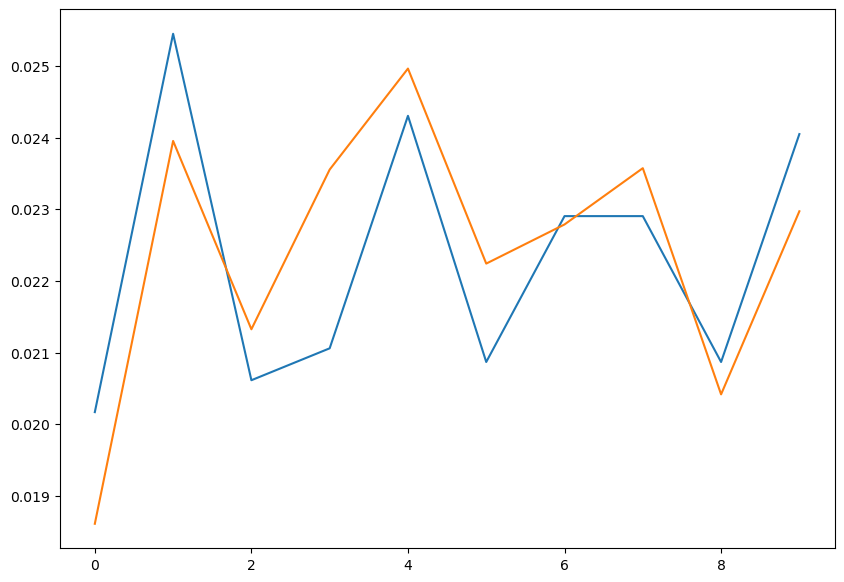

In [26]:
plt.figure(figsize=(10,7))
plt.plot(Y[:10])
plt.plot(y_prediction)

In [20]:
# GRU

In [12]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return (1/(1 + np.exp(-x)))


def loss_mse(y,y_pred):
    return sum(((y-y_pred)**2))

def loss_rmse(y,y_pred):
    return np.sqrt(sum(((y-y_pred)**2)))

def loss_r2(y,y_pred):
    y_mean = np.mean(y)
    return (1 - ((sum((y-y_pred)**2))/(sum((y-y_mean)**2)+0.0000000000000000000000000000001)))

In [15]:
class GRU:
    def __init__(self):
        self.Wfx = np.random.rand(50, 7)
        self.Wrx = np.random.rand(50, 7)
        self.Wfh = np.random.rand(50, 50)
        self.Wrh = np.random.rand(50, 50)
        self.Wy = np.random.rand(1, 50)
        
    def forward(self, X):
        self.h = np.zeros((len(X), 50))
        y = np.zeros((len(X)))
        self.f0 = sigmoid(self.Wfx.dot(X[0]))
        self.R0 = tanh(self.Wrx.dot(X[0]))
        self.h[0] = self.f0*self.R0
        y[0] = self.Wy.dot(self.h[0])

        self.f1 = sigmoid(self.Wfx.dot(X[1]) + self.Wfh.dot(self.h[0]))
        self.R1 = tanh(self.Wrx.dot(X[1]) + self.Wrh.dot(self.f1*self.h[0]))
        self.h[0] = (1-self.f1)*self.h[0] + self.f1*self.R1
        y[1] = self.Wy.dot(self.h[1])
        
        return y
        #return f0,R0,f1,R1,h,y
        
    def backward_prop(self, y, X, Y):
        dE0 = (y[0] - Y[0])
        dE1 = (y[1] - Y[1])
        self.dWfh = dE1*self.Wy.T.dot(self.R1*((1-sigmoid(self.Wfx.dot(X[1]) + self.Wfh.dot(self.h[0])))* \
                (sigmoid(self.Wfx.dot(X[1]) + self.Wfh.dot(self.h[0])))*(self.h[0])).reshape((1,50)))
    
        self.dWrh = dE1*self.Wy.T.dot((self.f1*(1-tanh(self.Wrx.dot(X[1]) + \
                    self.Wrh.dot(self.f1*self.h[0]))**2)*(self.f1*self.h[0])).reshape((1,50)))

        self.dWrx = dE0*self.Wy.dot(self.f0)*(1-tanh(self.Wrx.dot(X[0]))**2).reshape((50,1)).dot(X[0].reshape((1,7))) \
                    + dE1*self.Wy.dot(self.f1)*(1-tanh(self.Wrx.dot(X[1]) + self.Wrh.dot(self.f1*self.h[0]))**2).reshape((50,1)).dot(X[1].reshape((1,7)))  

        self.dWfx = dE0*(self.Wy.dot(self.R0))*((1-sigmoid(self.Wfx.dot(X[0])))* \
                    (sigmoid(self.Wfx.dot(X[0])))).reshape((50,1)).dot(X[0].reshape((1,7))) + \
                    dE1*self.Wy.dot(self.R1)*(1-sigmoid(self.Wfx.dot(X[1]) + \
                    self.Wfh.dot(self.h[0]))).dot(sigmoid(self.Wfx.dot(X[0])) + self.Wfh.dot(self.h[0]))*(X[0])

        self.dWy = (dE0*self.h[0] + dE1*self.h[1]).reshape((1,50)) 
        
    def update_params(self,  alpha=0.01):
        self.Wrx -= alpha * self.dWrx
        self.Wfx -= alpha * self.dWfx   
        self.Wfh -= alpha * self.dWfh 
        self.Wrh -= alpha * self.dWrh
        self.Wy -= alpha * self.dWy
    
    def train(self, X, Y, epochs):
        n = 10
        for i in range(epochs):
            for k in range(10): # 10
                y = self.forward(X[k:k+2])
                self.backward_prop(y,X[k:k+2], Y[k:k+2])
                self.update_params()

            if i % 1000 == 0:
                loss_mse_sum = 0
                loss_rmse_sum = 0
                loss_r2_sum = 0
                for j in range(10):
                    y_pred = self.forward(X[j:j+2])
                    #print(y_pred)
                    loss_mse_sum = loss_mse_sum + loss_mse(Y[j:j+2],y_pred)/2
                    loss_rmse_sum = loss_rmse_sum + loss_rmse(Y[j:j+2],y_pred)/2
                    loss_r2_sum = loss_r2_sum + loss_r2(Y[j:j+2],y_pred)/2
                    #y_pred = self.forward(X[j+n:j+2+n])
                    #loss_mse_sum_val = loss_mse_sum_val + loss_mse(Y[j+n:j+n+2],y_pred)/2
                    #loss_rmse_sum_val = loss_rmse_sum_val + loss_rmse(Y[j+n:j+n+2],y_pred)/2
                    #loss_r2_sum_val = loss_r2_sum_val + loss_r2(Y[j+n:j+n+2],y_pred)/2
                print(f"epoch: [{i}/{epochs}], mse={np.round(loss_mse_sum,5)}, rmse={np.round(loss_rmse_sum,5)}, r2={np.round(loss_r2_sum,3)}")

In [16]:
gru = GRU()
gru.train(X, Y, 100000)

epoch: [0/100000], mse=0.28354, rmse=1.03272, r2=-9.910785699980702e+28
epoch: [1000/100000], mse=0.00388, rmse=0.13748, r2=-2.8837385059263975e+27
epoch: [2000/100000], mse=0.00274, rmse=0.11655, r2=-2.69249476462457e+27
epoch: [3000/100000], mse=0.00271, rmse=0.11589, r2=-2.6516261575745275e+27
epoch: [4000/100000], mse=0.00272, rmse=0.1162, r2=-2.6399071138263303e+27
epoch: [5000/100000], mse=0.00272, rmse=0.11611, r2=-2.6355385584353716e+27
epoch: [6000/100000], mse=0.0027, rmse=0.11585, r2=-2.633597035331804e+27
epoch: [7000/100000], mse=0.00269, rmse=0.11553, r2=-2.632859234928796e+27
epoch: [8000/100000], mse=0.00267, rmse=0.11512, r2=-2.6338604862690105e+27
epoch: [9000/100000], mse=0.00292, rmse=0.12038, r2=-2.741787733576925e+27
epoch: [10000/100000], mse=0.00265, rmse=0.1148, r2=-2.645812698123386e+27
epoch: [11000/100000], mse=0.00263, rmse=0.1142, r2=-2.6302567694885325e+27
epoch: [12000/100000], mse=0.00262, rmse=0.11418, r2=-2.6263664384215255e+27
epoch: [13000/100000], 

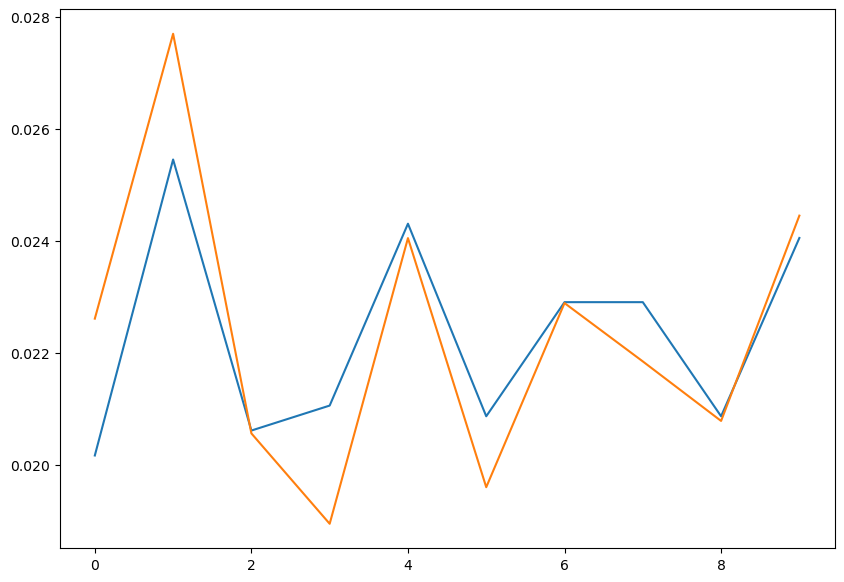

In [17]:
y_prediction = np.zeros((10))
for i in range(10):
    y_pred = gru.forward(X[i:i+2])
    #print(y_pred)
    y_prediction[i] = y_pred[0]
plt.figure(figsize=(10,7))
plt.plot(Y[:10])
plt.plot(y_prediction)

In [ ]:
# LSTM

In [35]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return (1/(1 + np.exp(-x)))


def loss_mse(y,y_pred):
    return sum(((y-y_pred)**2))

def loss_rmse(y,y_pred):
    return np.sqrt(sum(((y-y_pred)**2)))

def loss_r2(y,y_pred):
    y_mean = np.mean(y)
    return (1 - ((sum((y-y_pred)**2))/(sum((y-y_mean)**2)+0.0000000000000000000000000000001)))

In [47]:
class LSTM:
    def __init__(self):
        self.Wgx = np.random.rand(20, 7)
        self.Wix = np.random.rand(20, 7)
        self.Wox = np.random.rand(20, 7)

        self.Wgh = np.random.rand(20, 20)
        self.Woh = np.random.rand(20, 20)
        self.Wih = np.random.rand(20, 20)
        self.Wy = np.random.rand(1, 20)
        #return Wgx,Wix,Wox,Wgh,Woh,Wih,Wy
    
    def forward(self, X):
        y = np.zeros((len(X)))
        self.g0 = tanh(self.Wgx.dot(X[0]))
        self.i0 = sigmoid(self.Wix.dot(X[0]))
        self.o0 = sigmoid(self.Wox.dot(X[0]))
        self.s0 = self.g0*self.i0
        self.h0 = tanh(self.s0)*self.o0
        y[0] = self.Wy.dot(self.h0)

        self.g1 = tanh(self.Wgx.dot(X[1]) + self.Wgh.dot(self.h0))
        self.i1 = sigmoid(self.Wix.dot(X[1]) + self.Wih.dot(self.h0))
        self.o1 = sigmoid(self.Wox.dot(X[1]) + self.Woh.dot(self.h0))
        self.s1 = self.g1*self.i1
        self.h1 = tanh(self.s1)*self.o1
        y[1] = self.Wy.dot(self.h1)
        return y
    
    def backward_prop(self, y, X, Y):
        dE0 = (y[0] - Y[0])
        dE1 = (y[1] - Y[1])
        self.dWgx = dE0*self.Wy.T.dot((self.h0*self.o0).dot((1-tanh(self.s0)**2))*self.i0.dot((1- \
                    tanh(self.Wgx.dot(X[0]))**2).reshape((20,1)).dot(X[0].reshape((1,7)))).reshape((1,7))) \
                    + dE1*self.Wy.T.dot((self.h1*self.o1).dot((1-tanh(self.s1)**2))*self.i1.dot((1- \
                    tanh(self.Wgx.dot(X[1]) + self.Wgh.dot(self.h0))**2).reshape((20,1)).dot(X[1].reshape((1,7)))).reshape((1,7)))

        self.dWix = dE0*self.Wy.T.dot((self.h0*self.o0).dot((1-tanh(self.s0)**2))*self.g0.dot(((1- \
                sigmoid(self.Wix.dot(X[0])))*(sigmoid(self.Wix.dot(X[0])))).reshape((20,1)).dot(X[0].reshape((1,7)))).reshape((1,7))) \
                + dE1*self.Wy.T.dot((self.h1*self.o1).dot((1-tanh(self.s1)**2))*self.g1.dot(((1-sigmoid(self.Wix.dot(X[1]) + \
                self.Wih.dot(self.h0)))*(sigmoid(self.Wix.dot(X[1]) + self.Wih.dot(self.h0)))).reshape((20,1)).dot(X[1].reshape((1,7)))).reshape((1,7)))

        self.dWox = dE0*self.Wy.T.dot((self.h0*(tanh(self.s0))).dot(((1-sigmoid(self.Wox.dot(X[0])))* \
                (sigmoid(self.Wox.dot(X[0])))).reshape((20,1)).dot(X[0].reshape((1,7)))).reshape((1,7))) + \
                dE1*self.Wy.T.dot((self.h1*(tanh(self.s1))).dot(((1-sigmoid(self.Wox.dot(X[1]) + self.Woh.dot(self.h0)))*(sigmoid(self.Wox.dot(X[1]) + \
                self.Woh.dot(self.h0)))).reshape((20,1)).dot(X[1].reshape((1,7)))).reshape((1,7)))

        self.dWgh = dE1*self.Wy.dot(self.o1*(1-tanh(self.s0)**2).dot(self.i1)* \
                (1-tanh(self.Wgx.dot(X[1]) + self.Wgh.dot(self.h0))).dot(self.h0))

        self.dWih = dE1*self.Wy.dot(self.o1*(1-tanh(self.s0)**2).dot(self.g1)*((1-sigmoid(self.Wix.dot(X[1]) + \
                self.Wih.dot(self.h0))*sigmoid(self.Wix.dot(X[1]) + self.Wih.dot(self.h0)))).dot(self.h0))

        self.dWoh = dE1*self.Wy.dot(tanh(self.s0)*((1-sigmoid(self.Wox.dot(X[1]) + \
                self.Woh.dot(self.h0))*sigmoid(self.Wox.dot(X[1]) + self.Woh.dot(self.h0)))).dot(self.h0))

        self.dWy = (dE0*self.h0).reshape((1,20))
        
    def update_params(self, alpha=0.01):
        self.Wgx -= alpha * self.dWgx
        self.Wix -= alpha * self.dWix 
        self.Wox -= alpha * self.dWox 
        self.Wgh -=  alpha * self.dWgh
        self.Wih -= alpha * self.dWih 
        self.Woh -= alpha * self.dWoh
        self.Wy -= alpha * self.dWy
        
    def train(self, X, Y, epochs):
        n = 10
        for i in range(epochs):
            for o in range(10):
                y = self.forward(X[o:o+2])
                self.backward_prop(y,X[o:o+2], Y[o:o+2])
                self.update_params()

            if i % 1000 == 0:
                loss_mse_sum = 0
                loss_rmse_sum = 0
                loss_r2_sum = 0
                loss_mse_sum_val = 0
                loss_rmse_sum_val = 0
                loss_r2_sum_val = 0
                for j in range(10):
                    y_pred = self.forward(X[j:j+2])
                    loss_mse_sum = loss_mse_sum + loss_mse(Y[j:j+2],y_pred)
                    loss_rmse_sum = loss_rmse_sum + loss_rmse(Y[j:j+2],y_pred)
                    loss_r2_sum = loss_r2_sum + loss_r2(Y[j:j+2],y_pred)
                    y_pred = self.forward(X[j+n:j+n+2])
                    loss_mse_sum_val = loss_mse_sum_val + loss_mse(Y[j+n:j+n+2],y_pred)
                    loss_rmse_sum_val = loss_rmse_sum_val + loss_rmse(Y[j+n:j+n+2],y_pred)
                    loss_r2_sum_val = loss_r2_sum_val + loss_r2(Y[j+n:j+n+2],y_pred)
                print(f"epoch: [{i}/{epochs}], mse={np.round(loss_mse_sum,7)}, rmse={np.round(loss_rmse_sum,7)}, r2={np.round(loss_r2_sum,3)} ")
    #                  mse_val={np.round(loss_mse_sum_val,7)}, rmse_val={np.round(loss_rmse_sum_val,7)}, r2_val={np.round(loss_r2_sum_val,3)}         ")


In [48]:
lstm = LSTM()
lstm.train(X, Y, 100000)

epoch: [0/100000], mse=0.0235184, rmse=0.4666994, r2=-8.681001717298137e+27 
epoch: [1000/100000], mse=0.0014706, rmse=0.0886355, r2=-7.139734972238923e+25 
epoch: [2000/100000], mse=0.0007664, rmse=0.0691723, r2=-3.2714772012249737e+25 
epoch: [3000/100000], mse=0.0004703, rmse=0.055279, r2=-2.0297265824187112e+25 
epoch: [4000/100000], mse=0.000305, rmse=0.0451476, r2=-1.4498140016420373e+25 
epoch: [5000/100000], mse=0.0002099, rmse=0.0382583, r2=-1.160790219140765e+25 
epoch: [6000/100000], mse=0.0001546, rmse=0.0337396, r2=-1.0172456317937653e+25 
epoch: [7000/100000], mse=0.0001221, rmse=0.030756, r2=-9.489343815605317e+24 
epoch: [8000/100000], mse=0.0001029, rmse=0.0288025, r2=-9.197008483603749e+24 
epoch: [9000/100000], mse=9.15e-05, rmse=0.02755, r2=-9.104621612322947e+24 
epoch: [10000/100000], mse=8.47e-05, rmse=0.0267613, r2=-9.110653648350132e+24 
epoch: [11000/100000], mse=8.06e-05, rmse=0.0262694, r2=-9.161357546141244e+24 
epoch: [12000/100000], mse=7.81e-05, rmse=0.0

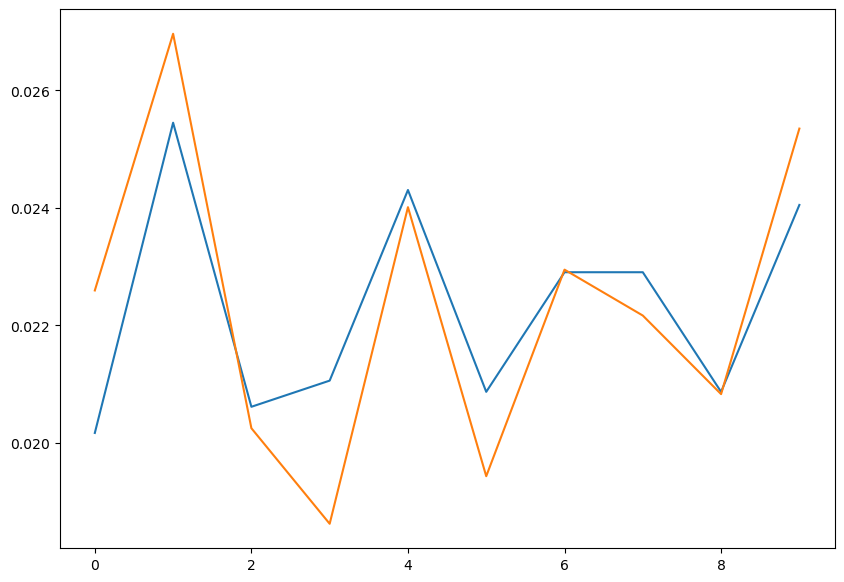

In [49]:
y_prediction = np.zeros((10))
for i in range(10):
    y_pred = lstm.forward(X[i:i+2])
    #print(y_pred)
    y_prediction[i] = y_pred[0]
plt.figure(figsize=(10,7))
plt.plot(Y[:10])
plt.plot(y_prediction)